In [ ]:
import numpy as np

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import re

**Reading csv file**

In [ ]:
zom=pd.read_csv('/content/zomato.csv')

In [ ]:
zom.head(5)

,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet


In [ ]:
zom.shape

(56252, 13)

In [ ]:
zom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56252 entries, 0 to 56251
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      56235 non-null  object
 1   name                         56236 non-null  object
 2   online_order                 56233 non-null  object
 3   book_table                   56194 non-null  object
 4   rate                         48414 non-null  object
 5   votes                        56174 non-null  object
 6   phone                        54956 non-null  object
 7   location                     56126 non-null  object
 8   rest_type                    55914 non-null  object
 9   dish_liked                   28027 non-null  object
 10  cuisines                     56049 non-null  object
 11  approx_cost(for two people)  55731 non-null  object
 12  listed_in(type)              51642 non-null  object
dtypes: object(13)
memory usage: 5.6

In [ ]:
zom.isnull().sum()

address                           17
name                              16
online_order                      19
book_table                        58
rate                            7838
votes                             78
phone                           1296
location                         126
rest_type                        338
dish_liked                     28225
cuisines                         203
approx_cost(for two people)      521
listed_in(type)                 4610
dtype: int64

In [ ]:
zom2=zom.drop(['dish_liked','address','phone'],axis=1)
zom2.shape


(56252, 10)

In [ ]:
zom2.isnull().sum()

name                             16
online_order                     19
book_table                       58
rate                           7838
votes                            78
location                        126
rest_type                       338
cuisines                        203
approx_cost(for two people)     521
listed_in(type)                4610
dtype: int64

**Dropping Duplicates**

In [ ]:
zom2.duplicated().sum()

17937

In [ ]:
zom2.drop_duplicates(inplace=True)
zom2.shape


(38315, 10)

In [ ]:
zom2.isnull().sum()

name                              1
online_order                      4
book_table                       37
rate                           3812
votes                            57
location                         97
rest_type                       243
cuisines                        150
approx_cost(for two people)     343
listed_in(type)                2748
dtype: int64

**Cleaning Rate Column**

In [ ]:
zom2['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', ...,
       " but we weren't blown away. It was",
       " also a slightly larger portion size wud be much appreciated...\\n\\nService - 5/10\\n\\nReally needs a lot of tweak up... the waiters are never to be found on the floor... they lack knowledge of dishes... very uninviting overall...\\n\\nOverall not a grt experience :(')",
       ' small place '], dtype=object)

In [ ]:
zom2['rate']=zom2['rate'].str.upper()

In [ ]:
zom2['rate']=zom2['rate'].replace(r'([A-Za-z]|_)', np.NaN, regex=True)


In [ ]:
zom2['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', nan, '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5', '4.5/5',
       '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '3.4 /5',
       '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5',
       '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5', '3.5 /5',
       '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5', '[]', '4.3 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5', '4.9 /5',
       '3.0 /5', ' ', '4.8 /5', '2.3 /5', "!')", '4.7 /5', '2.4 /5',
       " '')", '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
def handle(value):
  if (value=='nan' or value=='-' or value=='[]' or value=="!')" or value==" '')" or value==' ' or value=="!')"):
   return np.nan

  else:
    value=str(value).split('/')
    value=value[0]
    return float(value)

In [ ]:
zom2['rate']=zom2['rate'].apply(handle)

In [ ]:
zom2['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [ ]:
zom2['rate'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , nan, 4.2, 3.9, 3.1, 3. , 3.2, 3.3,
       2.8, 4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [ ]:
zom2['rate'].isnull().sum()

9239

**Filling Null values In Rate Column With Mean**

In [ ]:
zom2['rate'].mean()

3.713076076489201

In [ ]:
zom2['rate'].fillna(zom2['rate'].mean(),inplace=True)

**Dropping Null values**

In [ ]:
zom2['rate'].isnull().sum()

0

In [ ]:
zom2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38315 entries, 0 to 56251
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         38314 non-null  object 
 1   online_order                 38311 non-null  object 
 2   book_table                   38278 non-null  object 
 3   rate                         38315 non-null  float64
 4   votes                        38258 non-null  object 
 5   location                     38218 non-null  object 
 6   rest_type                    38072 non-null  object 
 7   cuisines                     38165 non-null  object 
 8   approx_cost(for two people)  37972 non-null  object 
 9   listed_in(type)              35567 non-null  object 
dtypes: float64(1), object(9)
memory usage: 3.2+ MB


In [ ]:
zom2.dropna(inplace=True)
zom2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35205 entries, 0 to 56251
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         35205 non-null  object 
 1   online_order                 35205 non-null  object 
 2   book_table                   35205 non-null  object 
 3   rate                         35205 non-null  float64
 4   votes                        35205 non-null  object 
 5   location                     35205 non-null  object 
 6   rest_type                    35205 non-null  object 
 7   cuisines                     35205 non-null  object 
 8   approx_cost(for two people)  35205 non-null  object 
 9   listed_in(type)              35205 non-null  object 
dtypes: float64(1), object(9)
memory usage: 3.0+ MB


In [ ]:
zom2.rename(columns={'approx_cost(for two people)':'cost2plates','listed_in(type)':'Type'},inplace=True)
zom2.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,Type
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet


**Cleaning cost2plates column**

In [ ]:
zom2['cost2plates'].unique()

array(['800', '300', '600', ..., ' Croquettines',
       ' as it is spacious and had a very wide variety of food and beverages.\\nI have visited Irish house a million times and it never ceases to keep up with the quality and taste of the food served.\\nFor a change',
       ' chk sausages (good)'], dtype=object)

In [ ]:
zom2['cost2plates']=zom2['cost2plates'].replace(r'([A-Za-z]|_)', np.NaN, regex=True)

In [ ]:
zom2['cost2plates'].unique()

array(['800', '300', '600', nan, '550', '500', '450', '650', '700', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '3,000', '2,800', '3,400', '40', '2,100', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '2,700', '4,500', '140', '1,650', "')"],
      dtype=object)

In [ ]:
def handle2(value):
  if (value=='nan'or value=="')"):
   return np.nan
  else:
    return value

In [ ]:
zom2['cost2plates']=zom2['cost2plates'].apply(handle2)

In [ ]:
zom2['cost2plates'].unique()

array(['800', '300', '600', nan, '550', '500', '450', '650', '700', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '3,000', '2,800', '3,400', '40', '2,100', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '2,700', '4,500', '140', '1,650'], dtype=object)

In [ ]:
def handlecoma(value):
  value=str(value)
  if ',' in value:
    value=value.replace(',','')
    return float(value)
  else:
    return float(value)

In [ ]:
zom2['cost2plates']=zom2['cost2plates'].apply(handlecoma)

In [ ]:
zom2['cost2plates'].unique()

array([ 800.,  300.,  600.,   nan,  550.,  500.,  450.,  650.,  700.,
        400.,  900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,
        250.,  950., 1000., 1500., 1300.,  199.,   80., 1100.,  160.,
       1600.,  230.,  130.,   50.,  190., 1700., 1400.,  180., 1350.,
       2200., 2000., 1800., 1900.,  330., 2500., 3000., 2800., 3400.,
         40., 2100., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,
        469.,   70., 3200.,   60.,  560.,  240.,  360., 6000., 1050.,
       2300., 4100., 5000., 3700., 2700., 4500.,  140., 1650.])

In [ ]:
zom2['cost2plates'].nunique()

70

In [ ]:
zom2['cost2plates'].isnull().sum()

3960

In [ ]:
zom2['cost2plates'].mean()

547.4487758041287

In [ ]:
zom2['cost2plates'].fillna(zom2['cost2plates'].mean(),inplace=True)

In [ ]:
zom2['cost2plates'].isnull().sum()

0

In [ ]:
zom2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35205 entries, 0 to 56251
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          35205 non-null  object 
 1   online_order  35205 non-null  object 
 2   book_table    35205 non-null  object 
 3   rate          35205 non-null  float64
 4   votes         35205 non-null  object 
 5   location      35205 non-null  object 
 6   rest_type     35205 non-null  object 
 7   cuisines      35205 non-null  object 
 8   cost2plates   35205 non-null  float64
 9   Type          35205 non-null  object 
dtypes: float64(2), object(8)
memory usage: 3.0+ MB


**Cleaning BookTable column**

In [ ]:
zom2['book_table'].unique()

array(['Yes', 'No', " 'RATED\\n  Amazing cafe", ...,
       ' ""RATED\\n  A decent place to have some traditional oriental cuisine. We were craving for some kick-ass noodles. While we did get the noodles',
       ' but cud be a bit less spicy... otherwise was grt',
       'VR Bengaluru\\nBeen here a few times '], dtype=object)

In [ ]:
zom2.head(30)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,Type
0,Jalsa,Yes,Yes,4.100000,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.000000,Buffet
1,Spice Elephant,Yes,No,4.100000,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.000000,Buffet
2,San Churro Cafe,Yes,No,3.800000,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.000000,Buffet
3,Addhuri Udupi Bhojana,No,No,3.700000,88,Banashankari,Quick Bites,"South Indian, North Indian",300.000000,Buffet
4,Grand Village,No,No,3.800000,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.000000,Buffet
5,Timepass Dinner,Yes,No,3.800000,286,Basavanagudi,Casual Dining,North Indian,600.000000,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.600000,8,Mysore Road,Casual Dining,"North Indian, South Indian, Andhra, Chinese",800.000000,Buffet
7,Onesta,Yes,Yes,4.600000,2556,Banashankari,"Casual Dining, Cafe","Pizza, Cafe, Italian",600.000000,Cafes
9,service was sluggish as they took too long to...,('Rated 4.0','RATED\n Amazing cafe,3.713076,no outdoor seating.\nFood is delicious,a nice place to give a try.'),('Rated 1.0',we had nachos cheese salsa which was okay. We...,547.448776,parking facility I could not locate. Staff ca...
10,Smacznego,Yes,No,4.200000,504,Banashankari,Cafe,"Cafe, Mexican, Italian, Momos, Beverages",550.000000,Cafes


In [ ]:
zom2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35205 entries, 0 to 56251
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          35205 non-null  object 
 1   online_order  35205 non-null  object 
 2   book_table    35205 non-null  object 
 3   rate          35205 non-null  float64
 4   votes         35205 non-null  object 
 5   location      35205 non-null  object 
 6   rest_type     35205 non-null  object 
 7   cuisines      35205 non-null  object 
 8   cost2plates   35205 non-null  float64
 9   Type          35205 non-null  object 
dtypes: float64(2), object(8)
memory usage: 3.0+ MB


In [ ]:
def handlestr(value):

  if (value=='Yes' or value=='No'):
   return value
  else:
    return np.nan

In [ ]:
zom2['book_table']=zom2['book_table'].apply(handlestr)

In [ ]:
zom2['book_table'].isnull().sum()

3960

In [ ]:
zom2.dropna(inplace=True)

In [ ]:
zom2.iloc[8:40]

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost2plates,Type
10,Smacznego,Yes,No,4.2,504,Banashankari,Cafe,"Cafe, Mexican, Italian, Momos, Beverages",550.0,Cafes
11,CafÃƒÂƒÃ‚ÂƒÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚Â‚ÃƒÂ‚Ã‚ÂƒÃƒÂƒÃ‚ÂƒÃƒÂ...,Yes,No,4.1,402,Banashankari,Cafe,Cafe,500.0,Cafes
12,Cafe Shuffle,Yes,Yes,4.2,150,Banashankari,Cafe,"Cafe, Italian, Continental",600.0,Cafes
13,The Coffee Shack,Yes,Yes,4.2,164,Banashankari,Cafe,"Cafe, Chinese, Continental, Italian",500.0,Cafes
14,Caf-Eleven,No,No,4.0,424,Banashankari,Cafe,"Cafe, Continental",450.0,Cafes
15,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Cafes
16,Cafe Vivacity,Yes,No,3.8,90,Banashankari,Cafe,Cafe,650.0,Cafes
17,Catch-up-ino,Yes,No,3.9,133,Banashankari,Cafe,"Cafe, Fast Food, Continental, Chinese, Momos",800.0,Cafes
18,Kirthi's Biryani,Yes,No,3.8,144,Banashankari,Cafe,"Chinese, Cafe, Italian",700.0,Cafes
19,T3H Cafe,No,No,3.9,93,Banashankari,Cafe,"Cafe, Italian, American",300.0,Cafes


In [ ]:
zom2['online_order'].unique()

array(['Yes', 'No'], dtype=object)

**Cleaning Rest Type column**

In [ ]:
zom2['rest_type'].value_counts()

Quick Bites                   11803
Casual Dining                  6625
Cafe                           2144
Delivery                       1434
Dessert Parlor                 1434
                              ...  
Quick Bites, Kiosk                1
Mess, Quick Bites                 1
Dessert Parlor, Food Court        1
Bakery, Sweet Shop                1
Pop Up                            1
Name: rest_type, Length: 93, dtype: int64

In [ ]:
rest_types=zom2['rest_type'].value_counts(ascending=False)
rest_types

Quick Bites                   11803
Casual Dining                  6625
Cafe                           2144
Delivery                       1434
Dessert Parlor                 1434
                              ...  
Quick Bites, Kiosk                1
Mess, Quick Bites                 1
Dessert Parlor, Food Court        1
Bakery, Sweet Shop                1
Pop Up                            1
Name: rest_type, Length: 93, dtype: int64

In [ ]:
rest_type_less_than_1000=rest_types[rest_types<1000]
rest_type_less_than_1000

Bakery                        728
Casual Dining, Bar            632
Beverage Shop                 486
Bar                           418
Food Court                    404
                             ... 
Quick Bites, Kiosk              1
Mess, Quick Bites               1
Dessert Parlor, Food Court      1
Bakery, Sweet Shop              1
Pop Up                          1
Name: rest_type, Length: 87, dtype: int64

In [ ]:
 def handle_resttype(value):
  if(value in rest_type_less_than_1000):
    return 'others'
  else:
    return value

In [ ]:
zom2['rest_type']=zom2['rest_type'].apply(handle_resttype)
zom2['rest_type'].value_counts()

Quick Bites           11803
Casual Dining          6625
others                 6619
Cafe                   2144
Delivery               1434
Dessert Parlor         1434
Takeaway, Delivery     1186
Name: rest_type, dtype: int64

**Cleaning Location column**

In [ ]:
zom2['location'].value_counts()

BTM                     2400
Whitefield              1775
HSR                     1620
Marathahalli            1514
Indiranagar             1462
                        ... 
Yelahanka                  5
Nagarbhavi                 4
Rajarajeshwari Nagar       2
Jakkur                     1
Peenya                     1
Name: location, Length: 93, dtype: int64

In [ ]:
location=zom2['location'].value_counts(ascending=False)
location_less_than_300=location[location<300]

In [ ]:
 def handle_location(value):
  if(value in location_less_than_300):
    return 'others'
  else:
    return value

In [ ]:
zom2['location']=zom2['location'].apply(handle_location)
zom2['location'].value_counts()

others                   5077
BTM                      2400
Whitefield               1775
HSR                      1620
Marathahalli             1514
Indiranagar              1462
JP Nagar                 1288
Electronic City          1173
Koramangala 5th Block    1166
Jayanagar                1156
Bellandur                1035
Bannerghatta Road         989
Sarjapur Road             835
Brigade Road              575
Banashankari              556
Brookefield               555
Koramangala 7th Block     546
New BEL Road              532
Kalyan Nagar              525
Koramangala 6th Block     512
Ulsoor                    508
Koramangala 1st Block     499
Malleshwaram              496
Koramangala 4th Block     459
Basavanagudi              457
Frazer Town               436
Rajajinagar               436
MG Road                   433
Banaswadi                 400
Kammanahalli              398
Old Airport Road          385
Richmond Road             358
Residency Road            355
Domlur    

**Cleaning Cuisines column**

In [ ]:
zom2['cuisines'].value_counts()


North Indian                                                                    1750
North Indian, Chinese                                                           1478
South Indian                                                                    1141
Bakery, Desserts                                                                 577
Biryani                                                                          546
                                                                                ... 
Continental, Tea, Fast Food, Italian                                               1
South Indian, North Indian, Andhra                                                 1
North Indian, South Indian, Chinese, Desserts                                      1
Fast Food, North Indian, Sandwich                                                  1
Continental, Mediterranean, Italian, North Indian, Finger Food, Asian, Momos       1
Name: cuisines, Length: 2623, dtype: int64

In [ ]:
cuisines=zom2['cuisines'].value_counts(ascending=False)
cuisines_less_than_100=cuisines[cuisines<100]

In [ ]:
 def handle_cuisines(value):
  if(value in cuisines_less_than_100):
    return 'others'
  else:
    return value

In [ ]:
zom2['cuisines']=zom2['cuisines'].apply(handle_cuisines)
zom2['cuisines'].value_counts()

others                                              16939
North Indian                                         1750
North Indian, Chinese                                1478
South Indian                                         1141
Bakery, Desserts                                      577
Biryani                                               546
Fast Food                                             484
South Indian, North Indian, Chinese                   474
Desserts                                              418
Cafe                                                  414
Bakery                                                377
Chinese                                               313
Ice Cream, Desserts                                   300
Mithai, Street Food                                   253
Chinese, North Indian                                 233
Desserts, Ice Cream                                   222
North Indian, Chinese, Biryani                        214
North Indian, 

In [ ]:
zom2['Type'].value_counts()

Delivery              14892
Dine-out              11542
Desserts               2282
Cafes                  1015
Drinks & nightlife      578
Buffet                  515
Pubs and bars           421
Name: Type, dtype: int64

# **DATA IS CLEAN NOW JUMP TO VISUALIZATION**





### COUNT PLOT OF VARIOUS LOCATION

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Bannerghatta Road'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Electronic City'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Marathahalli'),
  Text(10, 0, 'Koramangala 5th Block'),
  Text(11, 0, 'Richmond Road'),
  Text(12, 0, 'Koramangala 7th Block'),
  Text(13, 0, 'Koramangala 4th Block'),
  Text(14, 0, 'Bellandur'),
  Text(15, 0, 'Sarjapur Road'),
  Text(16, 0, 'Whitefield'),
  Text(17, 0, 'Old Airport Road'),
  Text(18, 0, 'Indiranagar'),
  Text(19, 0, 'Koramangala 1st Block'),
  Text(20, 0, 'Frazer Town'),
  Text(21, 0, 'MG Road'),
  Text(22, 0, 'Brigade Road'),
  Text(23, 0, 'Ulsoor'),
  Text(24, 0, 'Residency Road'),
  Text(25, 0, 'Domlur'),
  Text(26, 0, 'Malleshwaram'),
  Text(27, 0, 'Kammana

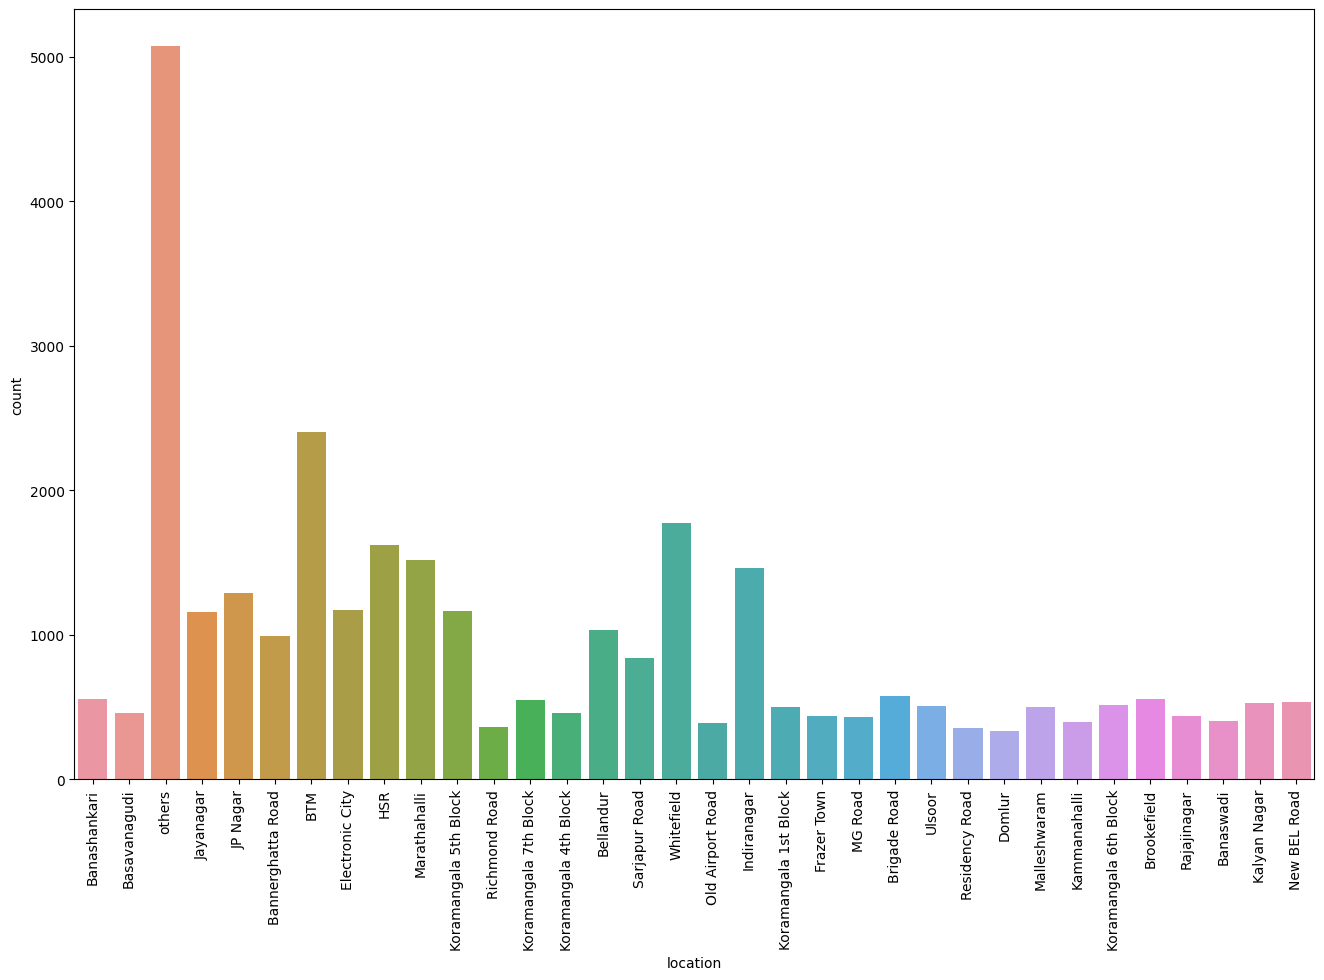

In [ ]:
plt.figure(figsize=(16,10))
ax=sns.countplot(x='location',data=zom2)
plt.xticks(rotation=90)

# VISUALIZING ONLINE ORDER

<Axes: xlabel='online_order', ylabel='count'>

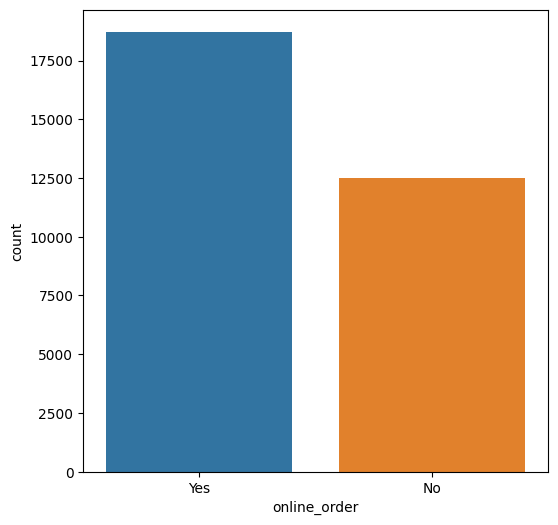

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='online_order',data=zom2)

In [ ]:
zom2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31245 entries, 0 to 56251
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          31245 non-null  object 
 1   online_order  31245 non-null  object 
 2   book_table    31245 non-null  object 
 3   rate          31245 non-null  float64
 4   votes         31245 non-null  object 
 5   location      31245 non-null  object 
 6   rest_type     31245 non-null  object 
 7   cuisines      31245 non-null  object 
 8   cost2plates   31245 non-null  float64
 9   Type          31245 non-null  object 
dtypes: float64(2), object(8)
memory usage: 2.6+ MB


# **Visualizing Book Table**

<Axes: xlabel='book_table', ylabel='count'>

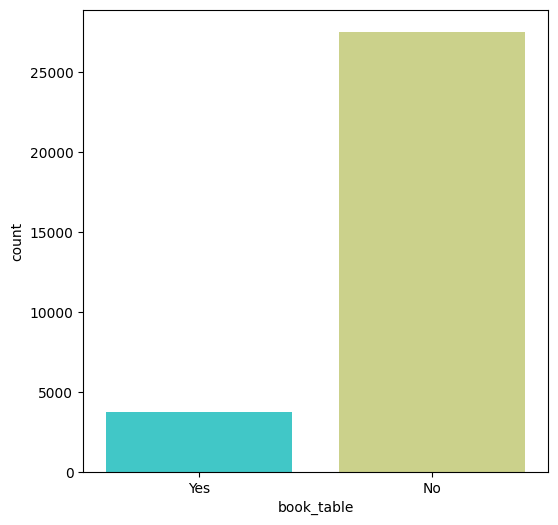

In [ ]:
plt.figure(figsize=(6,6))
sns.countplot(x='book_table',data=zom2,palette='rainbow')

**Visualizing Online Order Vs Rate**

<Axes: xlabel='online_order', ylabel='rate'>

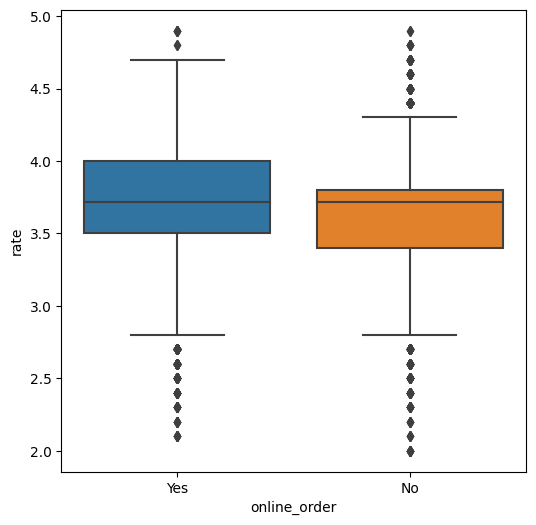

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y='rate',data=zom2)

**Visualizing Book Table Vs Rate**

<Axes: xlabel='book_table', ylabel='rate'>

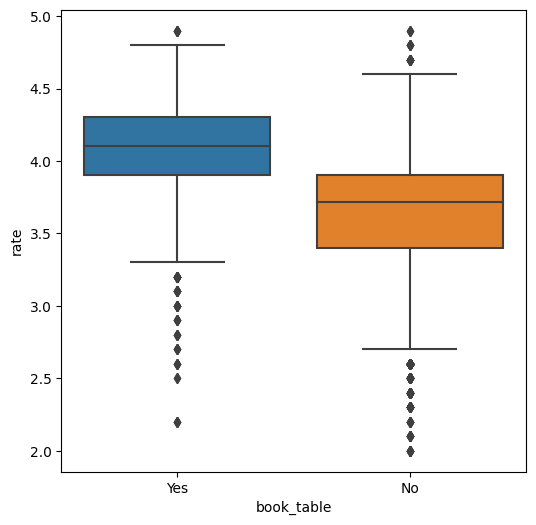

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x='book_table',y='rate',data=zom2)

**Visualizing Online Order Facility Location Wise**

In [ ]:
df1=zom2.groupby(['location','online_order'])['name'].count()
df1.to_csv('location_online.csv')
df1=pd.read_csv('location_online.csv')
df1=pd.pivot_table(df1,values=None,index=['location'],columns=['online_order'],fill_value=0,aggfunc=np.sum)
df1

name      
online_order             No   Yes
location                         
BTM                     784  1616
Banashankari            256   300
Banaswadi               195   205
Bannerghatta Road       379   610
Basavanagudi            181   276
Bellandur               403   632
Brigade Road            228   347
Brookefield             189   366
Domlur                  182   152
Electronic City         642   531
Frazer Town             201   235
HSR                     400  1220
Indiranagar             548   914
JP Nagar                503   785
Jayanagar               358   798
Kalyan Nagar            213   312
Kammanahalli            172   226
Koramangala 1st Block   144   355
Koramangala 4th Block   209   250
Koramangala 5th Block   385   781
Koramangala 6th Block   183   329
Koramangala 7th Block   168   378
MG Road                 234   199
Malleshwaram            201   295
Marathahalli            569   945
New BEL Road            230   302
Old Airport Road        191   194
Rajajinagar             206   230
Residency Road          217   138
Richmond Road           232   126
Sarjapur Road           253   582
Ulsoor                  191   317
Whitefield              817   958
others                 2249  2828

<Axes: xlabel='location'>

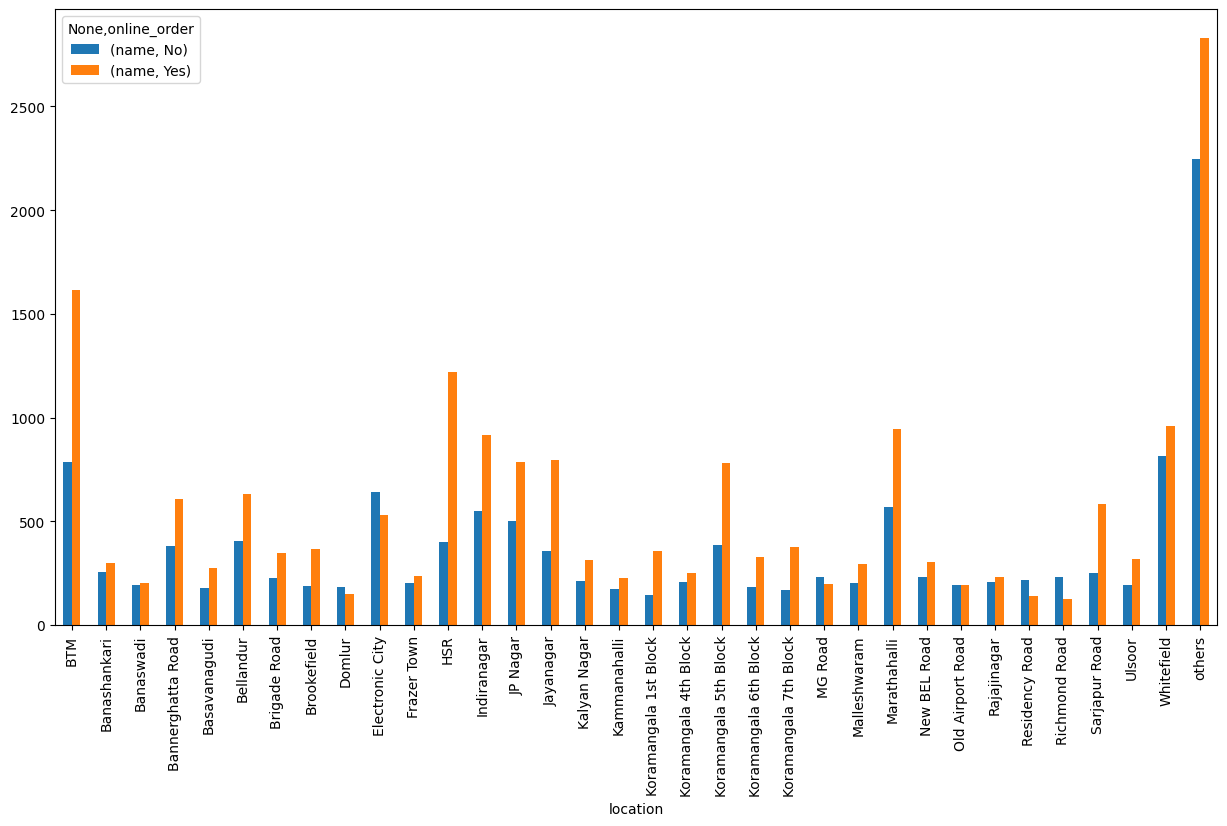

In [ ]:
df1.plot(kind='bar',figsize=(15,8))

**Visualizing Book Table Facility Location Wise**

In [ ]:
df2=zom2.groupby(['location','book_table'])['name'].count()
df2.to_csv('location_booktable.csv')
df2=pd.read_csv('location_booktable.csv')
df2=pd.pivot_table(df2,values=None,index=['location'],columns=['book_table'],fill_value=0,aggfunc=np.sum)
df2

name     
book_table               No  Yes
location                        
BTM                    2294  106
Banashankari            515   41
Banaswadi               394    6
Bannerghatta Road       932   57
Basavanagudi            445   12
Bellandur               957   78
Brigade Road            493   82
Brookefield             498   57
Domlur                  290   44
Electronic City        1090   83
Frazer Town             432    4
HSR                    1488  132
Indiranagar            1160  302
JP Nagar               1094  194
Jayanagar               969  187
Kalyan Nagar            436   89
Kammanahalli            370   28
Koramangala 1st Block   474   25
Koramangala 4th Block   318  141
Koramangala 5th Block   869  297
Koramangala 6th Block   458   54
Koramangala 7th Block   463   83
MG Road                 257  176
Malleshwaram            441   55
Marathahalli           1415   99
New BEL Road            497   35
Old Airport Road        333   52
Rajajinagar             407   29
Residency Road          268   87
Richmond Road           293   65
Sarjapur Road           746   89
Ulsoor                  409   99
Whitefield             1607  168
others                 4431  646

<Axes: xlabel='location'>

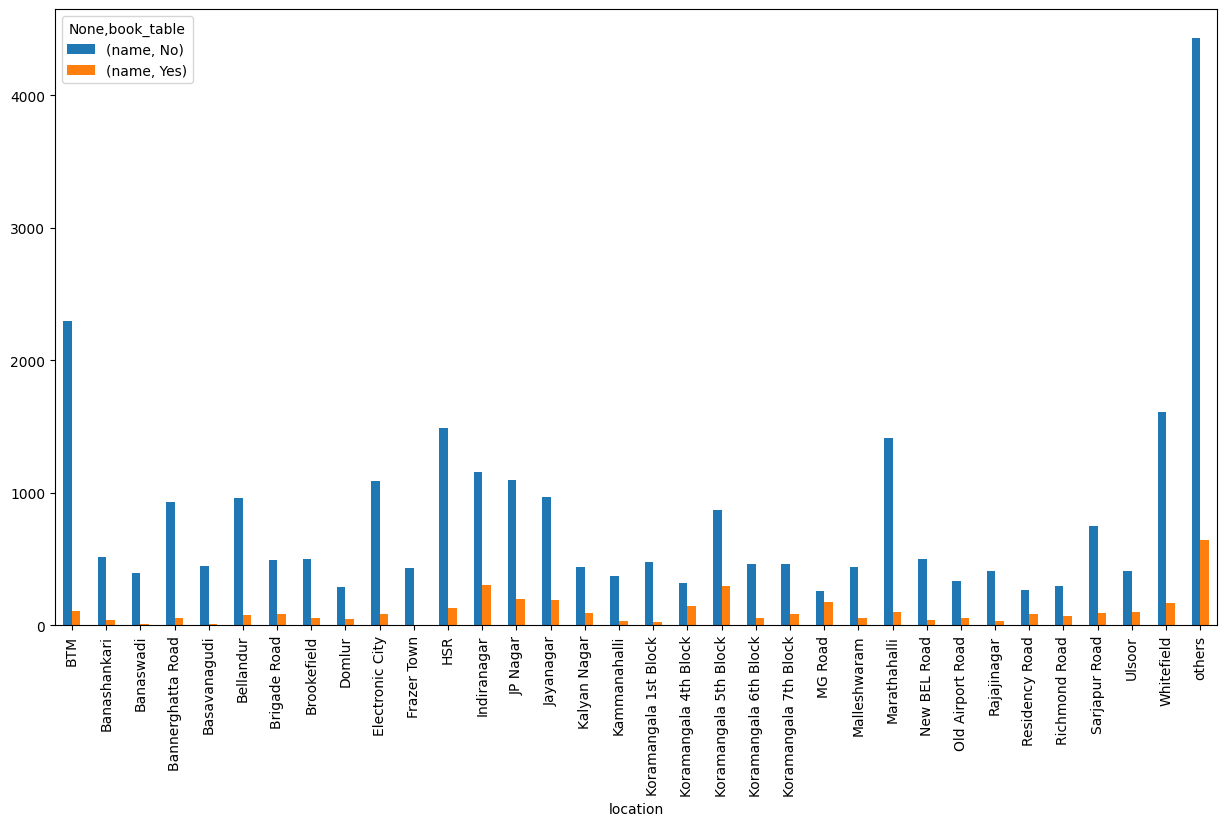

In [ ]:
df2.plot(kind='bar',figsize=(15,8))

**Visualizing Types of Restaurents vs Rate**

<Axes: xlabel='Type', ylabel='rate'>

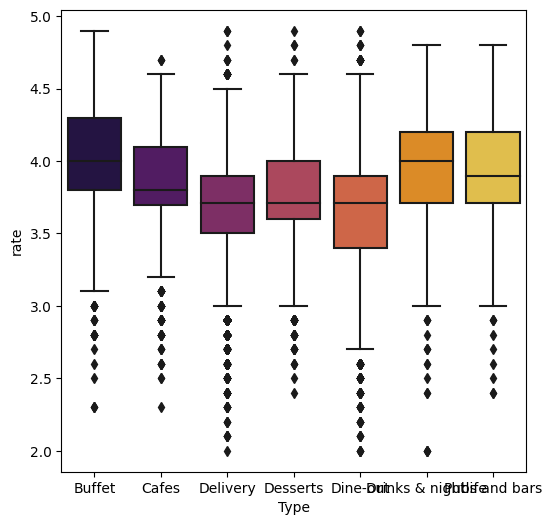

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(x='Type',y='rate',data=zom2,palette='inferno')

# **Grouping Types of Resturent Location Wise**

In [ ]:
df3=zom2.groupby(['location','Type'])['name'].count()
df3.to_csv('location_type.csv')
df3=pd.read_csv('location_type.csv')
df3=pd.pivot_table(df3,values=None,index=['location'],columns=['Type'],fill_value=0,aggfunc=np.sum)
df3

name                                   \
Type                  Buffet Cafes Delivery Desserts Dine-out   
location                                                        
BTM                       12    44     1373      106      837   
Banashankari               5    24      234       46      240   
Banaswadi                  0    12      154       19      210   
Bannerghatta Road          6    25      479       92      379   
Basavanagudi               4     8      193       45      204   
Bellandur                 23    32      480       65      406   
Brigade Road              13    21      223       45      236   
Brookefield                3    15      282       41      212   
Domlur                    11    12      163       24      103   
Electronic City           20    20      533       70      490   
Frazer Town                1    10      247       43      131   
HSR                       11    31     1014      102      449   
Indiranagar               22    75      727      116      435   
JP Nagar                  22    38      607      100      494   
Jayanagar                 17    42      520      113      452   
Kalyan Nagar               8    20      177       43      266   
Kammanahalli               2    13      155       18      208   
Koramangala 1st Block      3    10      298       30      146   
Koramangala 4th Block     10    30      213       32      121   
Koramangala 5th Block     29    76      502      105      393   
Koramangala 6th Block     11    24      248       40      155   
Koramangala 7th Block     13    30      223       69      188   
MG Road                   23    41      111       33      175   
Malleshwaram               8    24      181       62      201   
Marathahalli              21    26      827       91      538   
New BEL Road               3    25      259       31      205   
Old Airport Road          10     5      171       33      150   
Rajajinagar                9     4      189       44      184   
Residency Road            14    19       91       28      157   
Richmond Road             35     9      105       35      158   
Sarjapur Road             14    17      435       76      274   
Ulsoor                    10    29      205       32      205   
Whitefield                22    40      871      120      669   
others                   100   164     2402      333     1871   

                                                        
Type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                   14            14  
Banashankari                           7             0  
Banaswadi                              4             1  
Bannerghatta Road                      6             2  
Basavanagudi                           3             0  
Bellandur                             15            14  
Brigade Road                          24            13  
Brookefield                            2             0  
Domlur                                11            10  
Electronic City                       20            20  
Frazer Town                            2             2  
HSR                                    5             8  
Indiranagar                           45            42  
JP Nagar                              22             5  
Jayanagar                             12             0  
Kalyan Nagar                          11             0  
Kammanahalli                           2             0  
Koramangala 1st Block                  4             8  
Koramangala 4th Block                 32            21  
Koramangala 5th Block                 35            26  
Koramangala 6th Block                 18            16  
Koramangala 7th Block                  9            14  
MG Road                               29            21  
Malleshwaram                          12             8  
Marathahalli                          10             1  
New BEL Road          

<Axes: xlabel='location'>

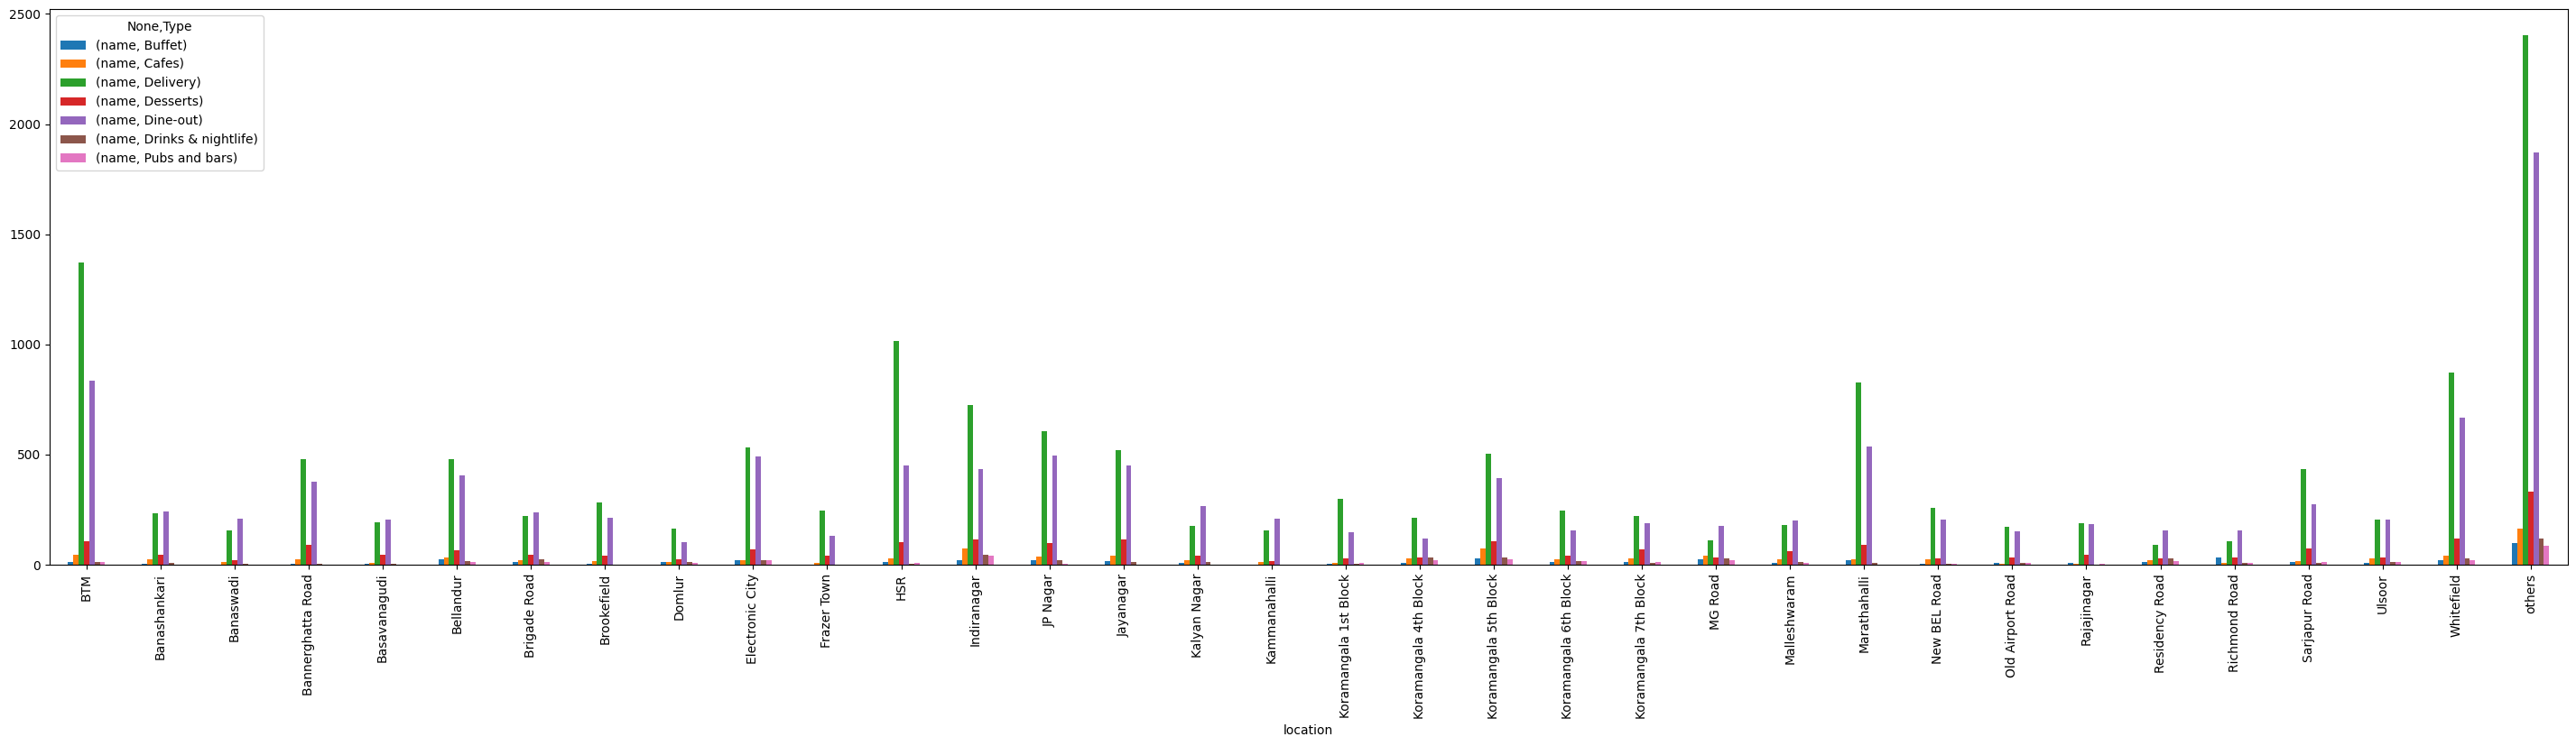

In [ ]:
df3.plot(kind='bar',figsize=(36,8))

**No Of Votes Location Wise**

In [ ]:
zom2['votes'] = pd.to_numeric(zom2['votes'])
zom2.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 31245 entries, 0 to 56251
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          31245 non-null  object 
 1   online_order  31245 non-null  object 
 2   book_table    31245 non-null  object 
 3   rate          31245 non-null  float64
 4   votes         31245 non-null  int64  
 5   location      31245 non-null  object 
 6   rest_type     31245 non-null  object 
 7   cuisines      31245 non-null  object 
 8   cost2plates   31245 non-null  float64
 9   Type          31245 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 2.6+ MB


In [ ]:
df4=zom2[['location','votes']]
df4.drop_duplicates()
df5=df4.groupby(['location'])['votes'].sum()
df5=df5.to_frame()
df5=df5.sort_values('votes',ascending=False)
df5.head()

,votes
location,
others,1050959
Koramangala 5th Block,774475
Indiranagar,589660
JP Nagar,338119
Jayanagar,334173


In [ ]:
df5=df5.iloc[1:, :]
df5.head()

,votes
location,
Koramangala 5th Block,774475
Indiranagar,589660
JP Nagar,338119
Jayanagar,334173
BTM,326866


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Koramangala 5th Block'),
  Text(1, 0, 'Indiranagar'),
  Text(2, 0, 'JP Nagar'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'BTM'),
  Text(5, 0, 'HSR'),
  Text(6, 0, 'Whitefield'),
  Text(7, 0, 'Koramangala 4th Block'),
  Text(8, 0, 'Koramangala 6th Block'),
  Text(9, 0, 'Marathahalli'),
  Text(10, 0, 'Koramangala 7th Block'),
  Text(11, 0, 'MG Road'),
  Text(12, 0, 'Brigade Road'),
  Text(13, 0, 'Sarjapur Road'),
  Text(14, 0, 'Bellandur'),
  Text(15, 0, 'Residency Road'),
  Text(16, 0, 'Koramangala 1st Block'),
  Text(17, 0, 'Bannerghatta Road'),
  Text(18, 0, 'Malleshwaram'),
  Text(19, 0, 'Ulsoor'),
  Text(20, 0, 'Banashankari'),
  Text(21, 0, 'New BEL Road'),
  Text(22, 0, 'Kalyan Nagar'),
  Text(23, 0, 'Electronic City'),
  Text(24, 0, 'Brookefield'),
  Text(25, 0, 'Domlur'),
  Text(26, 0, 'Old Airport Road'),
  Text(27, 0

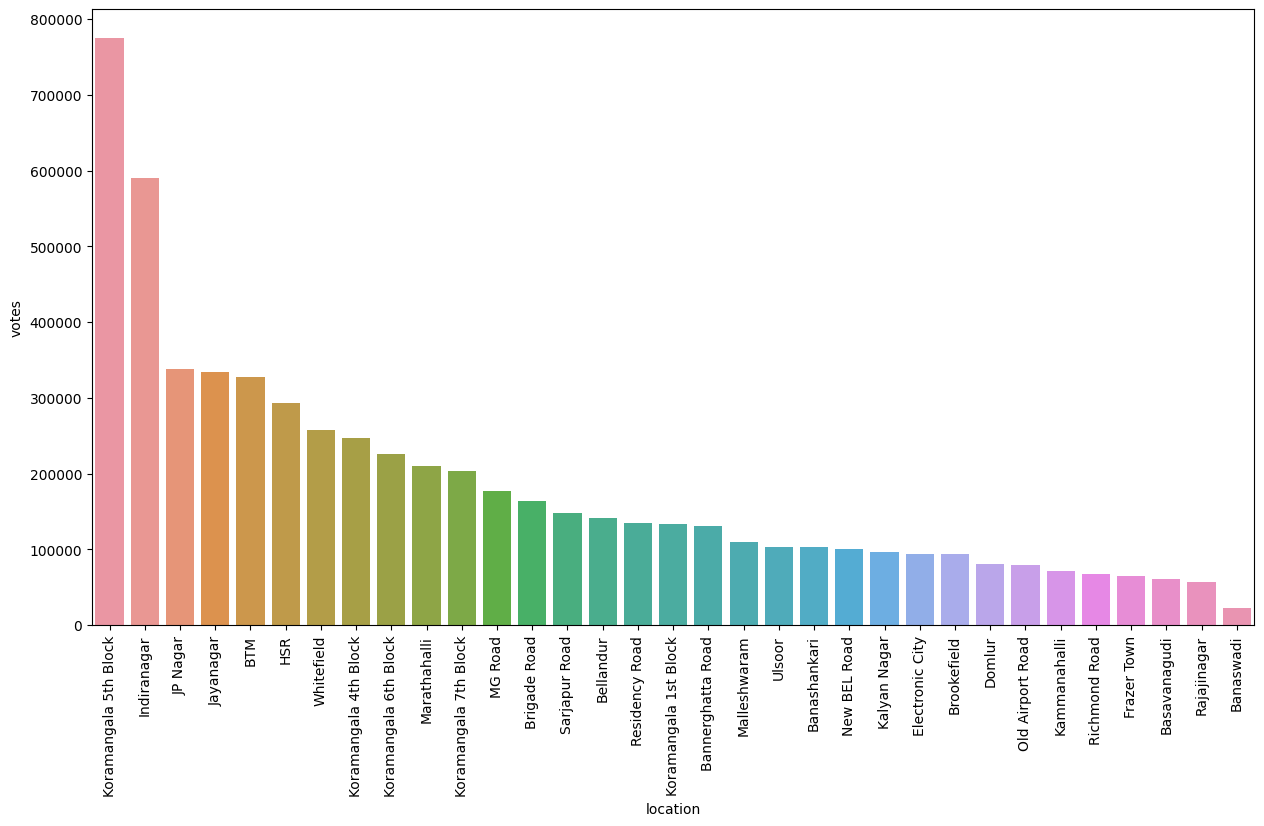

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(x=df5.index,y=df5['votes'])
plt.xticks(rotation=90)

**Visualizing Top Cuisines**

In [ ]:
df6=zom2[['cuisines','votes']]
df6.drop_duplicates()
df7=df6.groupby(['cuisines'])['votes'].sum()
df7=df7.to_frame()
df7=df7.sort_values('votes',ascending=False)
df7.head()

,votes
cuisines,
others,5395607
North Indian,319298
"North Indian, Chinese",171730
South Indian,83397
"North Indian, Mughlai",69864


In [ ]:
df7=df7.iloc[1:, :]
df7.head()

,votes
cuisines,
North Indian,319298
"North Indian, Chinese",171730
South Indian,83397
"North Indian, Mughlai",69864
"North Indian, South Indian",55481


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51]),
 [Text(0, 0, 'North Indian'),
  Text(1, 0, 'North Indian, Chinese'),
  Text(2, 0, 'South Indian'),
  Text(3, 0, 'North Indian, Mughlai'),
  Text(4, 0, 'North Indian, South Indian'),
  Text(5, 0, 'Ice Cream, Desserts'),
  Text(6, 0, 'Chinese'),
  Text(7, 0, 'Biryani, North Indian, Chinese'),
  Text(8, 0, 'Chinese, Momos'),
  Text(9, 0, 'South Indian, North Indian, Chinese'),
  Text(10, 0, 'Desserts'),
  Text(11, 0, 'Burger, Fast Food'),
  Text(12, 0, 'Finger Food'),
  Text(13, 0, 'Cafe'),
  Text(14, 0, 'Biryani'),
  Text(15, 0, 'Bakery, Desserts'),
  Text(16, 0, 'Desserts, Beverages'),
  Text(17, 0, 'Pizza, Fast Food'),
  Text(18, 0, 'Cafe, Continental'),
  Text(19, 0, 'Chinese, Thai'),
  Text(20, 0, 'South Indian, North Indian, Chinese, Street Food

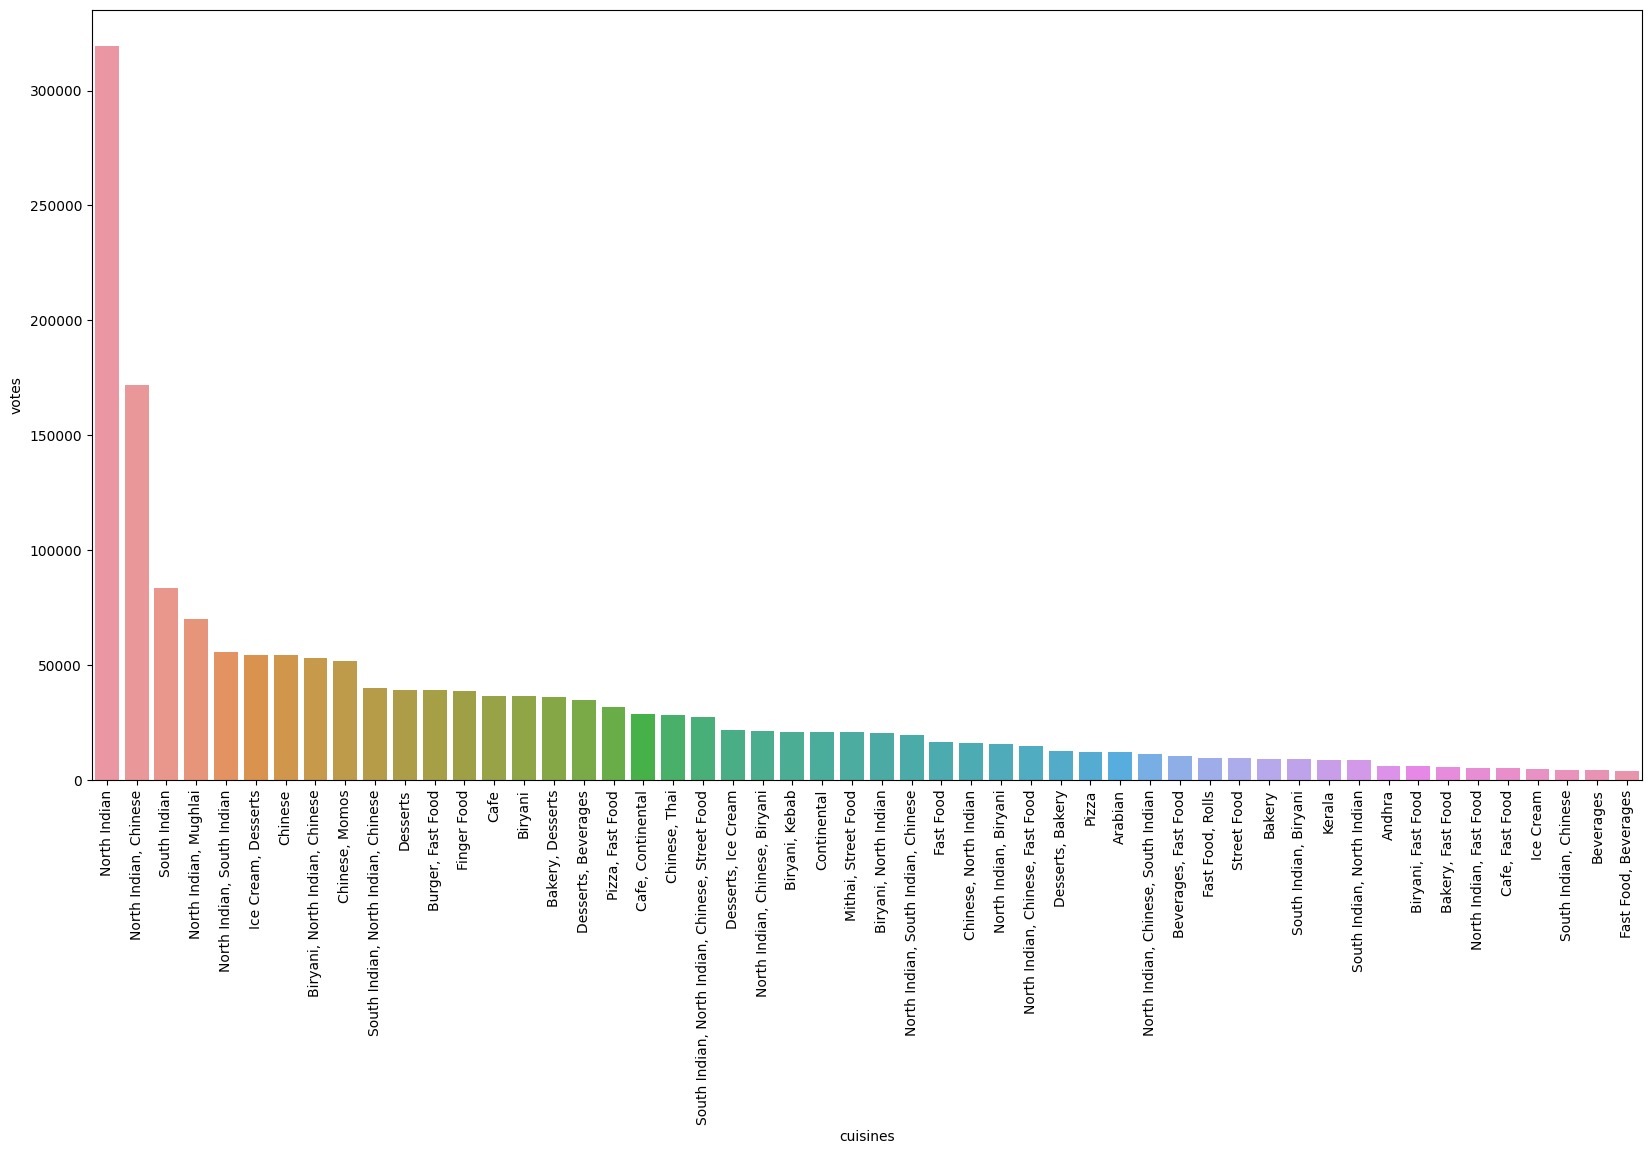

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x=df7.index,y=df7['votes'])
plt.xticks(rotation=90)